In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [16]:
col = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]


In [24]:
data = pd.read_csv("processed.hungarian.data", names=col)


In [51]:
X = data.drop(columns=['num'])
y = data['num']

In [54]:
y.value_counts(normalize = True)

0    0.639456
1    0.360544
Name: num, dtype: float64

In [101]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.3, random_state = 12,stratify= y)

In [102]:
train_y.value_counts(normalize = True)

0    0.639024
1    0.360976
Name: num, dtype: float64

In [103]:
test_y.value_counts(normalize = True)

0    0.640449
1    0.359551
Name: num, dtype: float64

In [104]:
train_X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
227,39,1,4,110.0,280.0,0.0,0.0,150.0,0.0,0,NaN,NaN,6.0
261,52,1,4,112.0,342.0,0.0,1.0,96.0,1.0,1,2.0,NaN,NaN
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0,NaN,NaN,NaN
61,43,0,2,120.0,215.0,0.0,1.0,175.0,0.0,0,NaN,NaN,NaN
260,51,1,3,135.0,160.0,0.0,0.0,150.0,0.0,2,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,46,1,1,140.0,272.0,1.0,0.0,175.0,0.0,2,2.0,NaN,NaN
288,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2,2.0,NaN,NaN
177,58,1,4,135.0,222.0,0.0,0.0,100.0,0.0,0,NaN,NaN,NaN
285,49,1,4,150.0,222.0,0.0,0.0,122.0,0.0,2,2.0,NaN,NaN


In [105]:
train_X.replace({'?':np.NaN}, inplace = True)

In [106]:
train_X.replace({'-9.0':np.NaN}, inplace = True)

In [107]:
train_X.isna().sum()

age           0
sex           0
cp            0
trestbps      1
chol         18
fbs           6
restecg       1
thalach       1
exang         1
oldpeak       0
slope       134
ca          202
thal        187
dtype: int64

In [108]:
#imputing the missing values
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 227 to 265
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       205 non-null    int64  
 1   sex       205 non-null    int64  
 2   cp        205 non-null    int64  
 3   trestbps  204 non-null    float64
 4   chol      187 non-null    float64
 5   fbs       199 non-null    float64
 6   restecg   204 non-null    float64
 7   thalach   204 non-null    float64
 8   exang     204 non-null    float64
 9   oldpeak   205 non-null    int64  
 10  slope     71 non-null     float64
 11  ca        3 non-null      float64
 12  thal      18 non-null     float64
dtypes: float64(9), int64(4)
memory usage: 22.4 KB


In [109]:
train_X.replace({np.NaN:'99999'}, inplace = True)

In [110]:
train_X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [111]:
train_X = train_X.apply(lambda x: x.astype('int'))

In [112]:
train_X.replace({99999: np.NaN}, inplace = True)

In [113]:
train_X.isna().sum()

age           0
sex           0
cp            0
trestbps      1
chol         18
fbs           6
restecg       1
thalach       1
exang         1
oldpeak       0
slope       134
ca          202
thal        187
dtype: int64

In [116]:
na_res = train_X.isna().sum()/train_X.shape[0]

In [129]:
col_selected = na_res[na_res.apply(lambda x: x<0.6)].index

In [130]:
train_X[col_selected]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
227,39,1,4,110.0,280.0,0.0,0.0,150.0,0.0,0
261,52,1,4,112.0,342.0,0.0,1.0,96.0,1.0,1
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0
61,43,0,2,120.0,215.0,0.0,1.0,175.0,0.0,0
260,51,1,3,135.0,160.0,0.0,0.0,150.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
255,46,1,1,140.0,272.0,1.0,0.0,175.0,0.0,2
288,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2
177,58,1,4,135.0,222.0,0.0,0.0,100.0,0.0,0
285,49,1,4,150.0,222.0,0.0,0.0,122.0,0.0,2


In [77]:
train_X.fillna(train_X.mean())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
227,39,1,4,110.0,280.0,0.0,0.0,150.0,0.0,0,1.887324,0.0,6.000000
261,52,1,4,112.0,342.0,0.0,1.0,96.0,1.0,1,2.000000,0.0,5.833333
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0,1.887324,0.0,5.833333
61,43,0,2,120.0,215.0,0.0,1.0,175.0,0.0,0,1.887324,0.0,5.833333
260,51,1,3,135.0,160.0,0.0,0.0,150.0,0.0,2,2.000000,0.0,5.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,46,1,1,140.0,272.0,1.0,0.0,175.0,0.0,2,2.000000,0.0,5.833333
288,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2,2.000000,0.0,5.833333
177,58,1,4,135.0,222.0,0.0,0.0,100.0,0.0,0,1.887324,0.0,5.833333
285,49,1,4,150.0,222.0,0.0,0.0,122.0,0.0,2,2.000000,0.0,5.833333


In [79]:
fillna_data = train_X.mean()

In [80]:
train_X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,205.000000,205.000000,205.000000,204.000000,187.000000,199.000000,204.000000,204.000000,204.000000,205.000000,71.000000,3.0,18.000000
mean,47.575610,0.756098,2.917073,132.093137,248.518717,0.055276,0.210784,139.357843,0.264706,0.521951,1.887324,0.0,5.833333
std,8.151771,0.430486,0.979171,17.220567,67.666906,0.229095,0.443543,23.815679,0.442262,0.866453,0.360527,0.0,1.617914
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,90.000000,0.000000,0.000000,1.000000,0.0,3.000000
25%,41.000000,1.000000,2.000000,120.000000,205.500000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,6.000000
50%,48.000000,1.000000,3.000000,130.000000,245.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.500000
75%,54.000000,1.000000,4.000000,140.000000,277.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000
max,66.000000,1.000000,4.000000,200.000000,529.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000


In [131]:
def preprocess(data,fillna_data= fillna_data,col_selected = col_selected):
    data.replace({'?':np.NaN}, inplace = True)
    data.replace({'-9.0':np.NaN}, inplace = True)
    data.replace({np.NaN:'99999'}, inplace = True)
    data = data.apply(lambda x: x.astype('int'))
    data.replace({99999: np.NaN}, inplace = True)
    data = data.fillna(fillna_data)
    data = data[col_selected]
    return data

In [132]:
preprocessed_train = preprocess(train_X)
preprocessed_test = preprocess(test_X)

In [133]:
preprocessed_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
227,39,1,4,110.0,280.0,0.0,0.0,150.0,0.0,0
261,52,1,4,112.0,342.0,0.0,1.0,96.0,1.0,1
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0
61,43,0,2,120.0,215.0,0.0,1.0,175.0,0.0,0
260,51,1,3,135.0,160.0,0.0,0.0,150.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
255,46,1,1,140.0,272.0,1.0,0.0,175.0,0.0,2
288,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2
177,58,1,4,135.0,222.0,0.0,0.0,100.0,0.0,0
285,49,1,4,150.0,222.0,0.0,0.0,122.0,0.0,2


In [138]:
model = RandomForestClassifier()
model.fit(preprocessed_train,train_y)

RandomForestClassifier()

In [139]:
train_pred = model.predict(preprocessed_train)

In [140]:
accuracy_score(train_y, train_pred)

1.0

In [141]:
test_pred = model.predict(preprocessed_test)

In [142]:
accuracy_score(test_y, test_pred)

0.7640449438202247

In [144]:
n_estimator_ = [25,50,75,100,150,200,250]
max_depth_ = [1,2,3,4,5,6,7,8,9,10,11,12,None]
min_sample_leaf_ = [1,2,3,4,5,6,7,8]

In [148]:
#Model Tuning

train_score = []
test_score = []
parameters = []
for i in n_estimator_:
    for j in max_depth_:
        for k in min_sample_leaf_:
            model= RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_leaf=k)
            model.fit(preprocessed_train,train_y)
            train_pred = model.predict(preprocessed_train)
            trainscore = accuracy_score(train_y, train_pred)
            train_score.append(trainscore)
            test_pred = model.predict(preprocessed_test)
            testscore = accuracy_score(test_y, test_pred)
            test_score.append(testscore)
            para = str(i)+" "+str(j)+" "+str(k)
            parameters.append(para)

In [149]:
train_score

[0.824390243902439,
 0.8390243902439024,
 0.8341463414634146,
 0.8195121951219512,
 0.8390243902439024,
 0.8390243902439024,
 0.824390243902439,
 0.8439024390243902,
 0.8682926829268293,
 0.8536585365853658,
 0.848780487804878,
 0.8536585365853658,
 0.8536585365853658,
 0.848780487804878,
 0.8536585365853658,
 0.848780487804878,
 0.8780487804878049,
 0.8634146341463415,
 0.8682926829268293,
 0.8585365853658536,
 0.8585365853658536,
 0.8634146341463415,
 0.8536585365853658,
 0.8585365853658536,
 0.9024390243902439,
 0.8829268292682927,
 0.8878048780487805,
 0.8731707317073171,
 0.8780487804878049,
 0.8682926829268293,
 0.8682926829268293,
 0.8536585365853658,
 0.9463414634146341,
 0.9219512195121952,
 0.9024390243902439,
 0.8926829268292683,
 0.8780487804878049,
 0.8829268292682927,
 0.8439024390243902,
 0.8585365853658536,
 0.9609756097560975,
 0.926829268292683,
 0.9073170731707317,
 0.8975609756097561,
 0.8829268292682927,
 0.8926829268292683,
 0.8536585365853658,
 0.8634146341463415

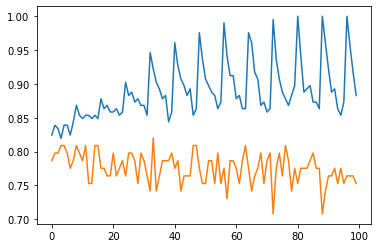

In [153]:
plt.plot(train_score[:100])
plt.plot(test_score[:100])

In [154]:
max(test_score)

0.8202247191011236

In [155]:
test_score.index(0.8202247191011236)

33

In [156]:
parameters[33]

'25 5 2'

In [157]:
Best_Score = max(test_score)

In [ ]:
n_estimaror = 25
max_depth = 5
min_samples_leaf = 2

In [169]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [163]:
parameters = {'n_estimators':[25,50,75,100], 'max_depth':[1,2,3,4,5,6,7,8,9], 'min_samples_leaf':[1,2,3,4,5]}

In [164]:
parameters

{'n_estimators': [25, 50, 75, 100],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [185]:
%%time
model= RandomForestClassifier()
gridsearch = GridSearchCV(model, parameters, cv = 10, verbose = 1, scoring = 'accuracy')
gridsearch.fit(preprocessed_train,train_y)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
CPU times: user 51.4 s, sys: 270 ms, total: 51.7 s
Wall time: 51.8 s


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [186]:
gridsearch.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=50)

In [187]:
train_pred = gridsearch.predict(preprocessed_train)
accuracy_score(train_y, train_pred)


0.8780487804878049

In [188]:
test_pred = gridsearch.predict(preprocessed_test)
accuracy_score(test_y, test_pred)

0.7752808988764045

In [189]:
%%time
model= RandomForestClassifier()
randomsearch = RandomizedSearchCV(model, parameters,  cv = 10, verbose = 1, scoring = 'accuracy')
randomsearch.fit(preprocessed_train,train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: user 3.34 s, sys: 19 ms, total: 3.36 s
Wall time: 3.36 s


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [25, 50, 75, 100]},
                   scoring='accuracy', verbose=1)

In [190]:
randomsearch.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=75)

In [191]:
train_pred = randomsearch.predict(preprocessed_train)
accuracy_score(train_y, train_pred)


0.9365853658536586

In [192]:
test_pred = randomsearch.predict(preprocessed_test)
accuracy_score(test_y, test_pred)

0.7640449438202247

In [208]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
import numpy as np
import pandas as pd  
X = pd.DataFrame({'city': ['London', 'London', 'Paris', 'Sallisaw'],
                   'rating': [5, 3, 4, 5]})  
ct = make_column_transformer(
       (StandardScaler(),
        make_column_selector(dtype_include=np.number)),  # rating
       (OneHotEncoder(),
        make_column_selector(dtype_include=object)))  # city
ct.fit_transform(X)  


array([[ 0.90453403,  1.        ,  0.        ,  0.        ],
       [-1.50755672,  1.        ,  0.        ,  0.        ],
       [-0.30151134,  0.        ,  1.        ,  0.        ],
       [ 0.90453403,  0.        ,  0.        ,  1.        ]])

In [209]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
prep_pipeline = ColumnTransformer(transformers=[("std_num", preprocessing.StandardScaler(), ["a", "b"])],
                                  remainder = "passthrough")
X = pd.DataFrame([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])
X.columns = ["a", "b", "c", "d"]
prep_pipeline.fit_transform(X)





array([[-1.,  0.,  2.,  2.],
       [ 1.,  0.,  0.,  1.]])

In [210]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import iris_data


X, y = iris_data()

scale_pipe = make_pipeline(ColumnSelector(cols=(0, 1)),
                           MinMaxScaler())

pipeline = Pipeline([
    ('feats', FeatureUnion([
        ('col_1-2', scale_pipe),
        ('col_3-4', ColumnSelector(cols=(2, 3)))
    ])),
    ('clf', KNeighborsClassifier())
])


pipeline.fit(X, y)

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('col_1-2',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(cols=(0,
                                                                                       1))),
                                                                 ('minmaxscaler',
                                                                  MinMaxScaler())])),
                                                ('col_3-4',
                                                 ColumnSelector(cols=(2,
                                                                      3)))])),
                ('clf', KNeighborsClassifier())])

In [211]:
from itertools import combinations

all_comb = []
for size in range(1, 5):
    all_comb += list(combinations(range(X.shape[1]), r=size))
print(all_comb)

[(0,), (1,), (2,), (3,), (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3), (0, 1, 2, 3)]


In [212]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(),
                     ColumnSelector(),
                     KNeighborsClassifier())

param_grid = {'columnselector__cols': all_comb,
              'kneighborsclassifier__n_neighbors': list(range(1, 11))}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)
print('Best parameters:', grid.best_params_)
print('Best performance:', grid.best_score_)

Best parameters: {'columnselector__cols': (2, 3), 'kneighborsclassifier__n_neighbors': 1}
Best performance: 0.9733333333333334
